In [ ]:
import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test)=mnist.load_data()

In [ ]:

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9316 - loss: 0.2302 - val_accuracy: 0.9560 - val_loss: 0.1565
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9610 - loss: 0.1346 - val_accuracy: 0.9611 - val_loss: 0.1301
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9718 - loss: 0.0976 - val_accuracy: 0.9674 - val_loss: 0.1107
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9804 - loss: 0.0697 - val_accuracy: 0.9691 - val_loss: 0.1016
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0528 - val_accuracy: 0.9704 - val_loss: 0.0983
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9872 - loss: 0.0429 - val_accuracy: 0.9715 - val_loss: 0.0959
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9912 - loss: 0.0340 - val_accuracy: 0.9717 - val_loss: 0.0930
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0278 - 

In [ ]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu ))
model.add(tf.keras.layers.Dense(units=10, activation= tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_test, y_test, epochs=3)
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)




Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7410 - loss: 1.0403
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9187 - loss: 0.2925
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9372 - loss: 0.2232
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9423 - loss: 0.2080
0.9490000009536743
0.18458354473114014


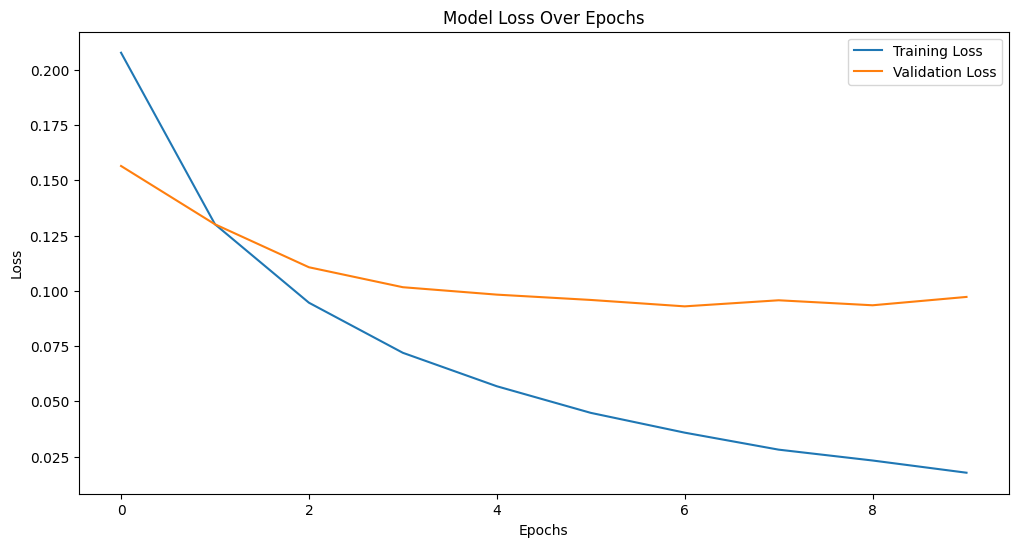

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('digits.h5')

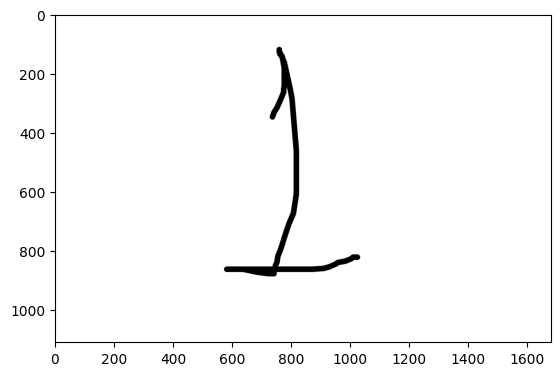

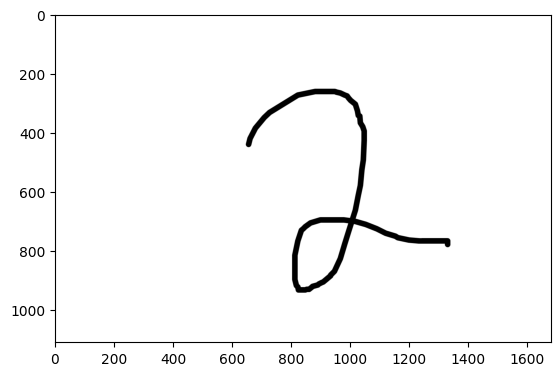

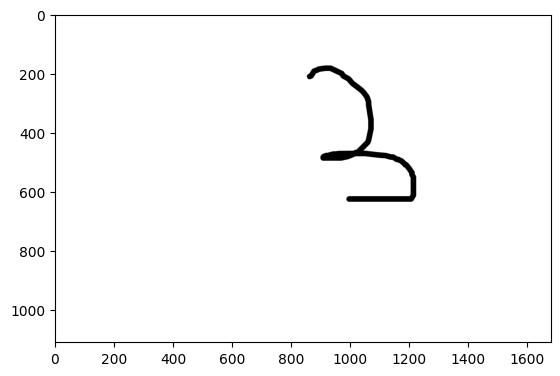

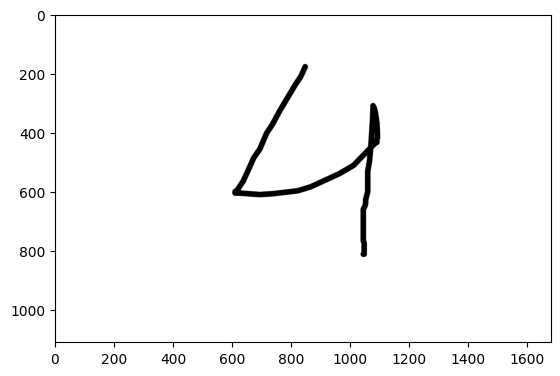

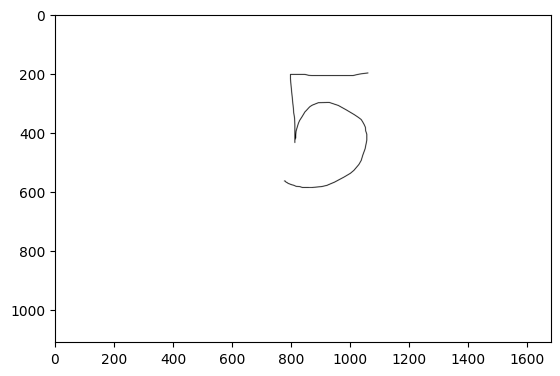

In [ ]:

for x in range(1,6):
  img = cv.imread(f'{x}.png')[:,:,0]
  img = np.invert(np.array([img]))
  plt.imshow(img[0], cmap=plt.cm.binary)
  plt.show()

In [ ]:
# List of image file paths
image_paths = [
    '/content/test_1.png',
    '/content/test_2.png',
    '/content/test_3.png',
    '/content/test_4.png',
    '/content/test_5.png',
]

for image_path in image_paths:
    image = cv.imread(image_path)[:,:,0]

    # Preprocessing (adjust based on your model's needs)
    image = cv.resize(image, (28, 28))  # Example resizing
    image = image / 255.0  # Example normalization

    # Add batch dimension
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    print(f"Image: {image_path}, Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image: /content/test_1.png, Predicted Class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image: /content/test_2.png, Predicted Class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image: /content/test_3.png, Predicted Class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image: /content/test_4.png, Predicted Class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image: /content/test_5.png, Predicted Class: 2
